# Q1

In [1]:
# import libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, roc_auc_score,ConfusionMatrixDisplay

In [2]:
# read the dataset
df = pd.read_csv(r"D:\OneDrive - NITT\Custom_Download\Assignment 3_Q1 diabetes_health_indicators_data.csv")

In [3]:
# get 10000 sample 
df = df.sample(10000)

In [4]:
# check for missing Values
df.isna().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
# get X and y
X = df.drop('Diabetes',axis=1).values
y = df['Diabetes'].values

In [6]:
# split the data into train and test i.e 80:20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# build knn model
classifier = KNeighborsClassifier(n_neighbors = 5)

# fit and predict
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
def get_result(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # compute Specificity,Sensitivity,Auc,Accuracy
    TNR = tn/(tn+fp) 
    TPR = tp/(tp+fn)
    ACC = (tp+tn)/(tp+fp+fn+tn)
    auc = roc_auc_score(y_test, y_pred)

    print("Specificity:",round(TNR,3))
    print("Sensitivity:",round(TPR,3))
    print("Accuracy:",round(ACC,3))
    print("Auc:",round(auc,3))
    print('---------Confusion Matrix--------------')
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=[0,1])
    disp.plot()

    plt.show()

Specificity: 0.956
Sensitivity: 0.178
Accuracy: 0.849
Auc: 0.567
---------Confusion Matrix--------------


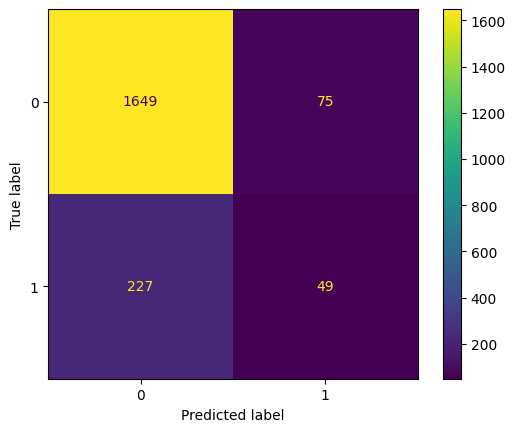

In [10]:
get_result(y_test,y_pred)

# Elbow Method

In [11]:
error_rate = []

# run knn with k=1 to 39
for i in tqdm(range(1,40)):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # compute how many times (in percentage) y_pred is not equal to y_test
    error_rate.append(np.mean(y_pred != y_test))

100%|███████████████████████████████████████████████████████████████████████████████| 39/39 [00:10<00:00,  3.85it/s]


In [12]:
np.mean([True,False,True]) # example

0.6666666666666666

Minimum error:- 0.1335 at k= 12


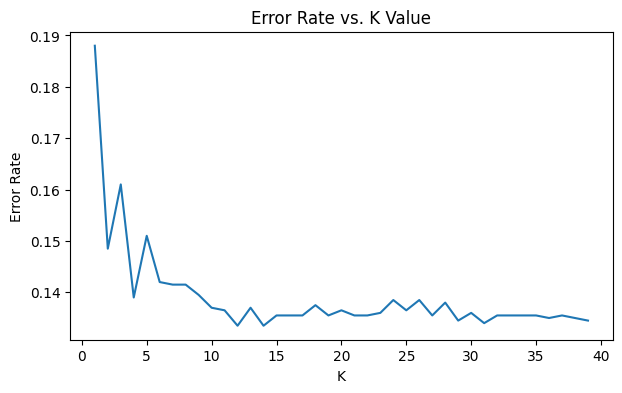

In [13]:
# plot the graph
plt.figure(figsize=(7,4))
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# at what value of k, the error was less
# 1 is added since array index starts with 0
k_best = np.array(error_rate).argmin()+1

print("Minimum error:-",min(error_rate),'at k=',k_best)

In [14]:
print('k_best:',k_best)

k_best: 12


In [15]:
# train the knn model on k_best
classifier = KNeighborsClassifier(n_neighbors = k_best)

# fit and predict
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Specificity: 0.988
Sensitivity: 0.105
Accuracy: 0.866
Auc: 0.547
---------Confusion Matrix--------------


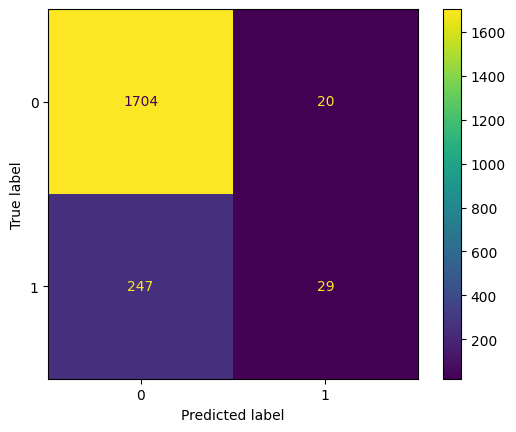

In [16]:
get_result(y_test,y_pred)

- Compared to Accuracy at k=5 and k_best, at k_best Accuracy is more , therefore this is better model

# Q2

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_csv(r"D:\OneDrive - NITT\Custom_Download\BostonHousing_Assignment_3_Q3.csv")

In [19]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [20]:
# get X and y
X = df.drop('MEDV',axis=1).values
y = df['MEDV'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
# build LinearRegression model
regressor = LinearRegression()

# fit and predict
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# mae result
print(round(mean_absolute_error(y_test,y_pred),3))

2.679


In [24]:
# build KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# fit and predict
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

# mae result
print(round(mean_absolute_error(y_test,y_pred),3))

2.467


- LinearRegression is better because of having low MAE value